$\textbf{*** This version uses the }\texttt{Dataloader, Asset, Portfolio}\textbf{ classes to load data}$

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import importlib

sys.path.append('../')

from IPython.display import display, Math, Latex

# From data_preparation classes
from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.outliers.outliers import DataOutliers

In [3]:
# Import required packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math

## Reading the Data File

In [4]:
# Defining time_index_col (must be the same column in all inputs) and keep_cols refering to the columns that will remain in the dataset
dataloader = DataLoader(time_index_col='DATE',
                        keep_cols=['VOLUME', 'OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'TRANSACTIONS'])

Here we will select $N=15,000$ ticks from our database for simplicity. We also select the equity $\textbf{TSLA}-Apple$ from  the data available.

In [5]:
# Example Files
fname_RUBEUR = 'FX/RUBEUR_2020-04-07_2022-04-06.parquet'
fname_USDBRL = 'FX/USDBRL_2020-04-07_2022-04-06.parquet'
fname_AAPL = 'equities/AAPL_2020-04-07_2022-04-06.parquet'
fname_TSLA = 'equities/TSLA_2020-04-07_2022-04-06.parquet'

# No. of Records from example dataset
N = 15000

In [6]:
# Dataset chosen in this simulation
ticker = 'TSLA'
fname = fname_TSLA

In [7]:
# loading assets into to an unique df
df = dataloader.load_dataset({ticker: '../data/' + fname}).iloc[:N]
display(df)

,TSLA_VOLUME,TSLA_OPEN,TSLA_HIGHT,TSLA_LOW,TSLA_CLOSE,TSLA_VW,TSLA_TRANSACTIONS
DATE,,,,,,,
2020-04-07 12:44:00,12730.0,107.8200,108.0220,107.8000,108.0220,107.9410,62
2020-04-07 12:45:00,2660.0,108.1000,108.1000,108.1000,108.1000,108.1064,32
2020-04-07 12:46:00,25895.0,108.1200,108.2000,108.0600,108.1000,108.1376,79
2020-04-07 12:47:00,4750.0,108.0020,108.1600,108.0000,108.1600,108.0972,42
2020-04-07 12:48:00,9385.0,108.1980,108.2000,108.1520,108.2000,108.1773,56
...,...,...,...,...,...,...,...
2020-05-07 12:21:00,580.0,156.1843,156.1843,156.1843,156.1843,156.1716,6
2020-05-07 12:22:00,1375.0,156.0354,156.0354,156.0354,156.0354,156.0390,14
2020-05-07 12:23:00,5405.0,156.0000,156.0000,156.0000,156.0000,156.0083,29


# Initialize the Outliers class with the data

In [8]:
# Create or load some data
data = df

In [9]:
outliers_detector = DataOutliers(data)

# Visualize data using Standard Deviation

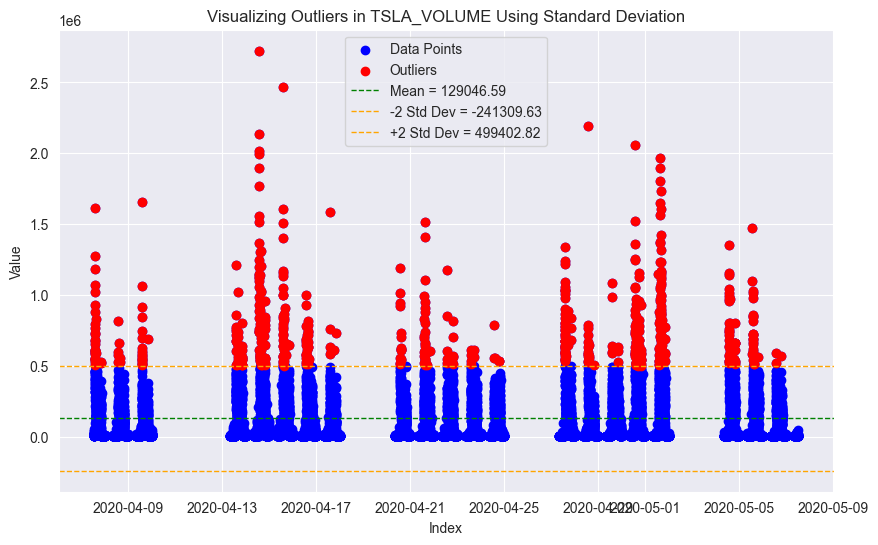

In [10]:
std_dev_with_outliers = outliers_detector.calculate_outliers_using_std('TSLA_VOLUME', 3)

# Visualize data using z-score (Histogram and Scatter Plot)

In [11]:
z_score = outliers_detector.calculate_zscore('TSLA_VOLUME')
outlier_indices = np.where(z_score > 3)[0]

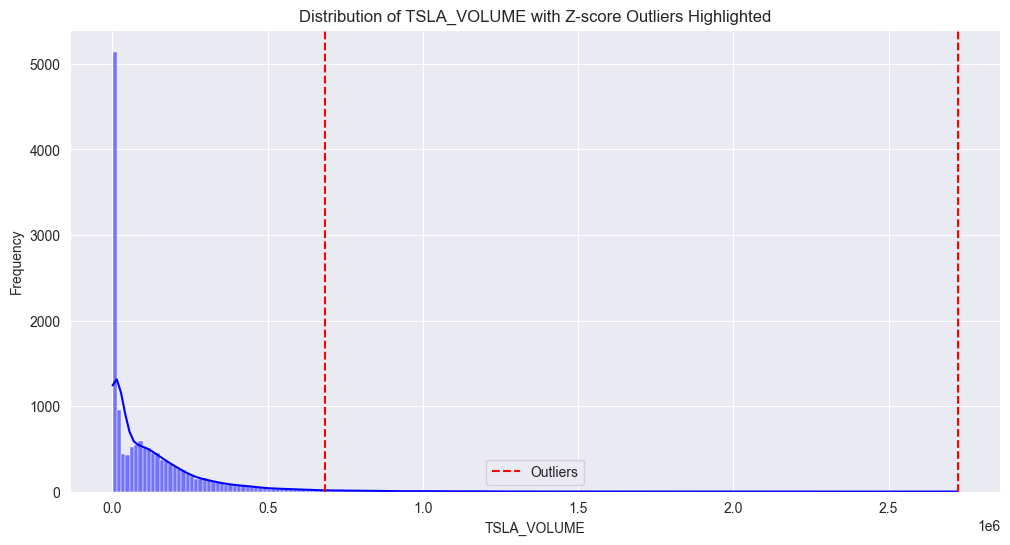

In [12]:
outliers_detector.hist_plot('TSLA_VOLUME', outlier_indices)

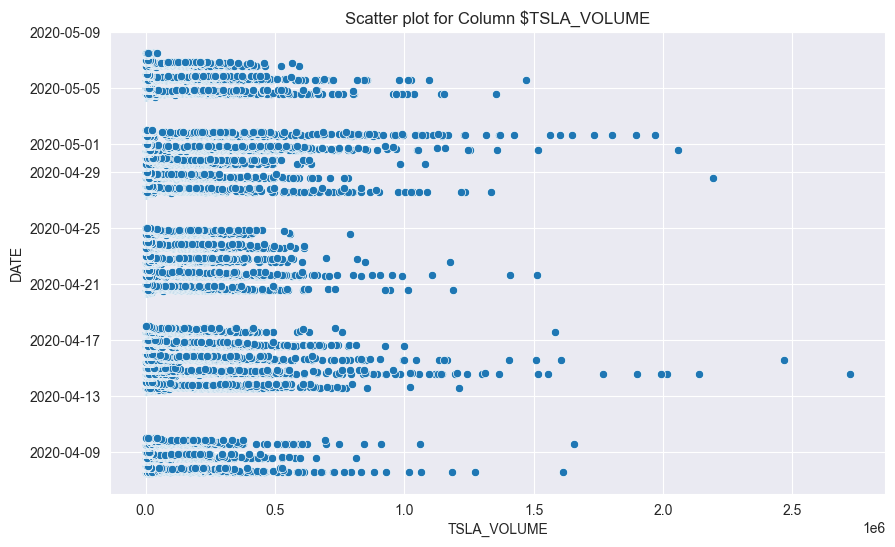

In [13]:
outliers_detector.scatter_plot('TSLA_VOLUME')

# Visualize outliers using IQR

In [14]:
outliers_detector.create_outliers_column('TSLA_VOLUME')

,TSLA_VOLUME,TSLA_OPEN,TSLA_HIGHT,TSLA_LOW,TSLA_CLOSE,TSLA_VW,TSLA_TRANSACTIONS,outliers
DATE,,,,,,,,
2020-04-07 12:44:00,12730.0,107.8200,108.0220,107.8000,108.0220,107.9410,62,False
2020-04-07 12:45:00,2660.0,108.1000,108.1000,108.1000,108.1000,108.1064,32,False
2020-04-07 12:46:00,25895.0,108.1200,108.2000,108.0600,108.1000,108.1376,79,False
2020-04-07 12:47:00,4750.0,108.0020,108.1600,108.0000,108.1600,108.0972,42,False
2020-04-07 12:48:00,9385.0,108.1980,108.2000,108.1520,108.2000,108.1773,56,False
...,...,...,...,...,...,...,...,...
2020-05-07 12:21:00,580.0,156.1843,156.1843,156.1843,156.1843,156.1716,6,False
2020-05-07 12:22:00,1375.0,156.0354,156.0354,156.0354,156.0354,156.0390,14,False
2020-05-07 12:23:00,5405.0,156.0000,156.0000,156.0000,156.0000,156.0083,29,False


In [15]:
max_outliers_tsla_volume = df.loc[df['outliers'], 'TSLA_VOLUME'].max()
min_outliers_tsla_volume = df.loc[df['outliers'], 'TSLA_VOLUME'].min()
print(max_outliers_tsla_volume)
print(min_outliers_tsla_volume)
print("Lower Bound : " + str(outliers_detector.lowerBound))
print("Upper Bound : " + str(outliers_detector.upperBound))

2723300.0
435175.0
Lower Bound : -249515.625
Upper Bound : 435099.375


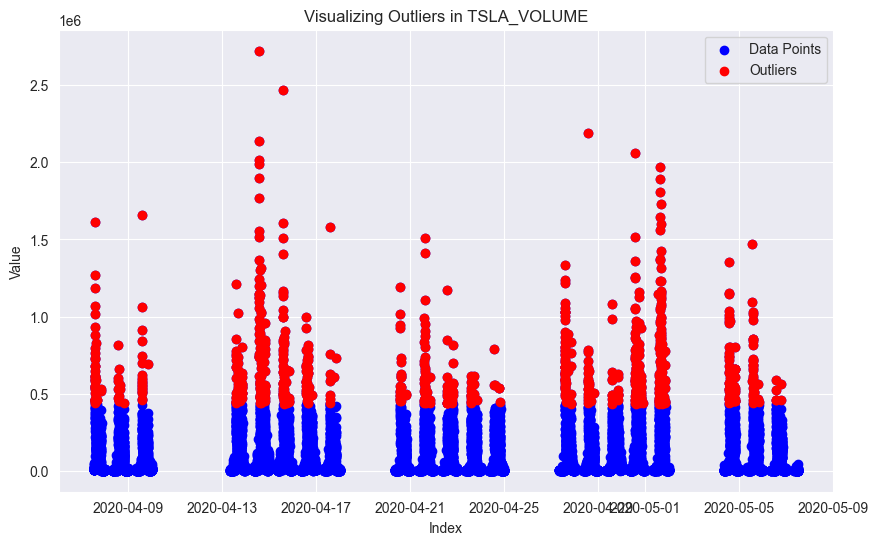

In [16]:
outliers_detector.visualize_outliers('TSLA_VOLUME')

# Remove outliers for TSLA_VOLUME

In [17]:
cleaned_data = outliers_detector.remove_outliers(['TSLA_VOLUME'])
outliers_detector = DataOutliers(cleaned_data)
z_score = outliers_detector.calculate_zscore('TSLA_VOLUME')
outlier_indices = np.where(z_score > 3)[0]

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


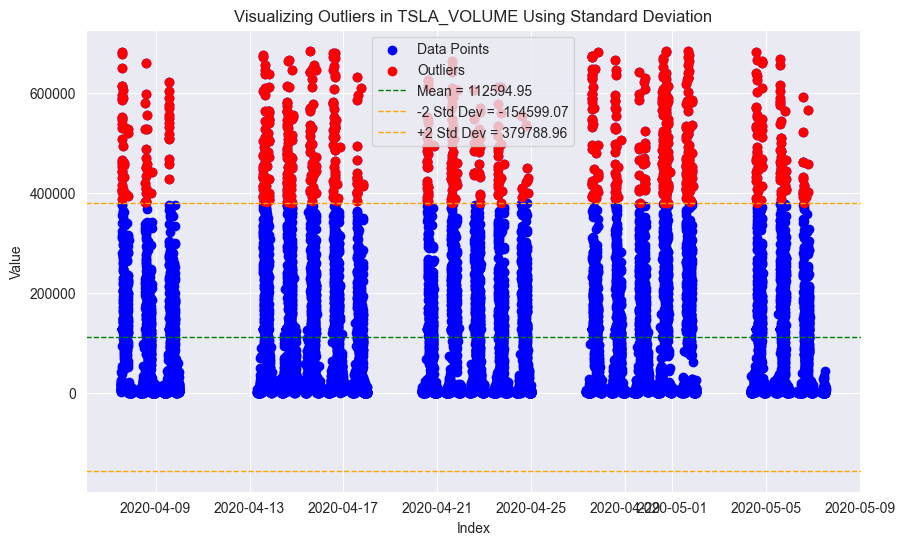

In [18]:
# Visualize data using standard deviation
std_dev_with_outliers = outliers_detector.calculate_outliers_using_std('TSLA_VOLUME', 3)

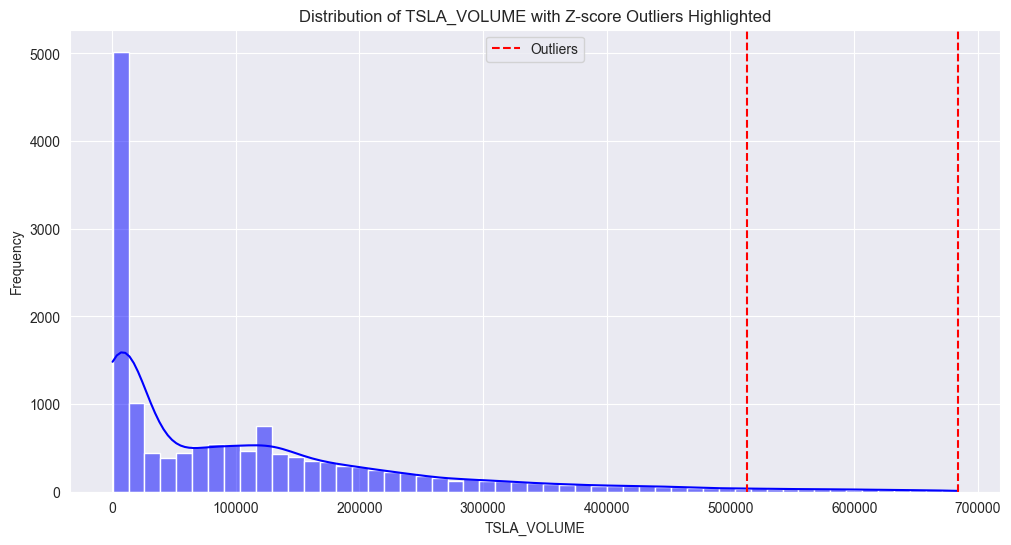

In [19]:
# Visualize data using z-score
outliers_detector.hist_plot('TSLA_VOLUME', outlier_indices)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


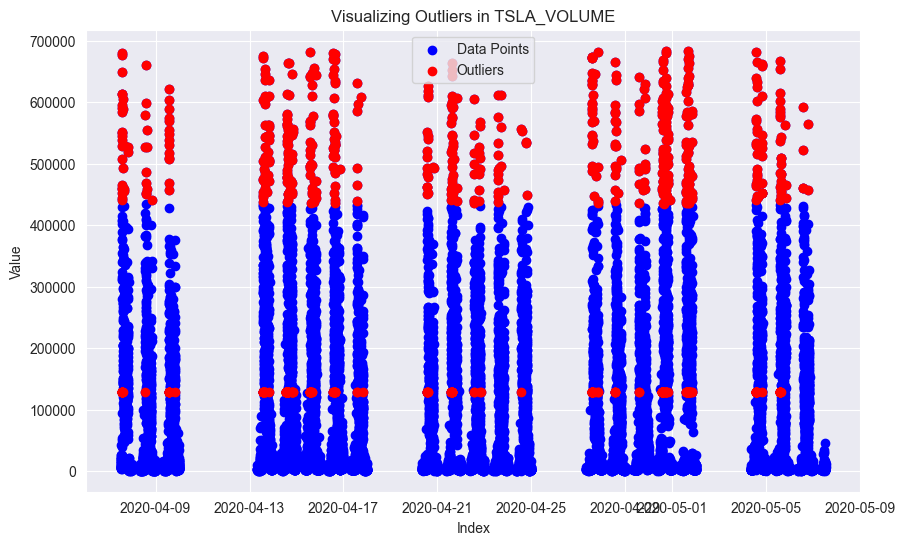

In [20]:
# Visualize data using IQR
outliers_detector.visualize_outliers('TSLA_VOLUME')

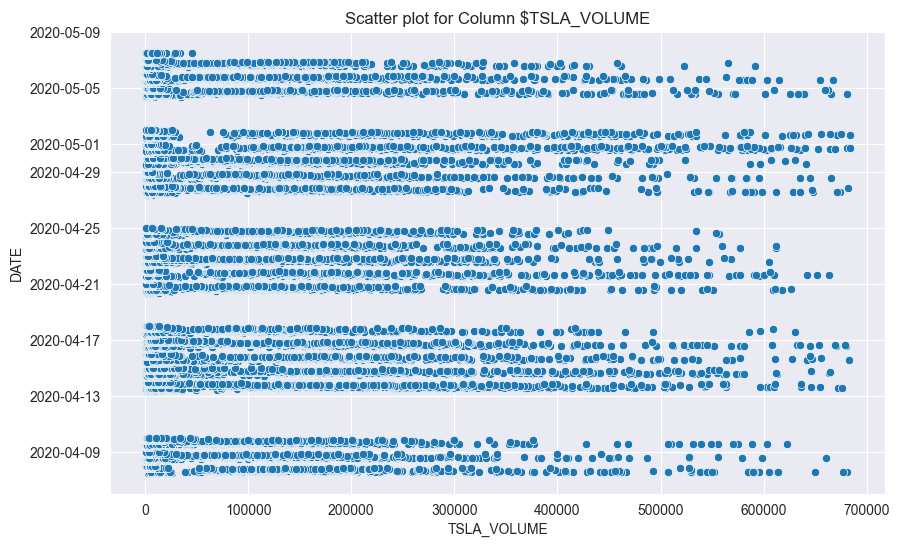

In [21]:
outliers_detector.scatter_plot('TSLA_VOLUME')